# Customer Segmentation
*A virtual retail analytics internship experience.*

### Summary
TBC

### Technical details
Programming language: Python

### Requirements and Importing data

In [67]:
%pip install pyarrow

Note: you may need to restart the kernel to use updated packages.


In [68]:
import pandas as pd
import pyarrow
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
# # read data, then convert and write to feather
# purchases = pd.read_csv("data/QVI_purchase_behaviour.csv")
# transactions = pd.read_excel("data/QVI_transaction_data.xlsx", converters={"PROD_NAME": str})
# transactions = transactions.reset_index(drop=True)

# purchases.to_feather("data/purchases.feather")
# transactions.to_feather("data/transactions.feather")

In [70]:
purchases = pd.read_feather("data/purchases.feather")
transactions = pd.read_feather("data/transactions.feather")

### Task 1: Examine and Clean Transaction data
* Look for inconsistencies, missing data across the data set
* Identify outliers
* Correctly identified category items, numeric data across all tables
* Handle anomalies by making necessary changes in the dataset and save it

##### View

In [71]:
# view transactions data
print(f"Shape of transactions data: {transactions.shape}")
transactions.head()

Shape of transactions data: (264836, 8)


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


##### Check data types

In [72]:
# check data types of each column
data_types = transactions.dtypes
print("Data Types:")
print(data_types)

Data Types:
DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
dtype: object


Data is imported with the correct numeric format where necessary.

In [73]:
# overview of data
transactions.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


##### Check missing values

In [74]:
# check for missing values
missing_values = transactions.isnull().sum()
print("Missing values:")
print(missing_values)

Missing values:
DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64


##### Check duplicates

In [75]:
# check for duplicates
duplicates = transactions[transactions.duplicated()]
print(f"{len(duplicates)} duplicates found.")
print(duplicates)

# remove duplicates
filtered_transactions = transactions.drop_duplicates()
print(f"After removing duplicates, the shape of transaction data is: {filtered_transactions.shape}")

1 duplicates found.
             DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
124845 2018-10-01        107          107024  108462        45   

                                     PROD_NAME  PROD_QTY  TOT_SALES  
124845  Smiths Thinly Cut   Roast Chicken 175g         2        6.0  
After removing duplicates, the shape of transaction data is: (264835, 8)


##### Handle outliers

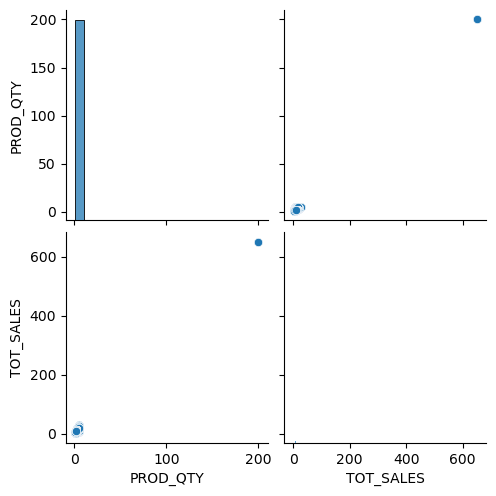

In [76]:
# visualise the data to view outliers
sns.pairplot(filtered_transactions[["PROD_QTY", "TOT_SALES"]])

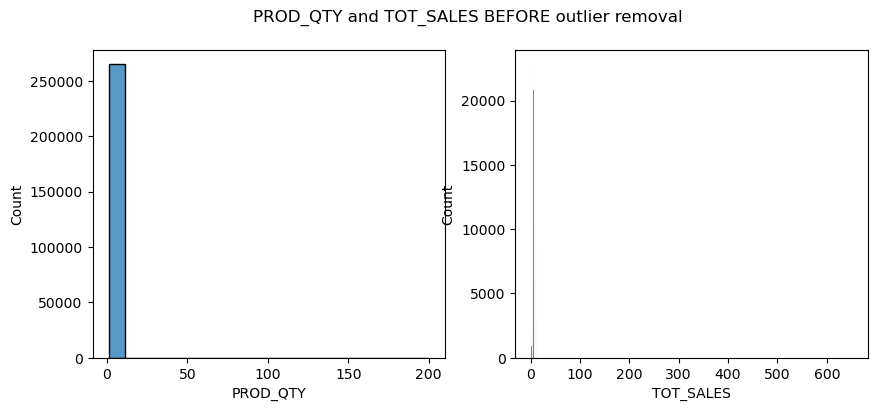

In [77]:
# visualise the data to view outliers (cont.)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(filtered_transactions["PROD_QTY"], ax=axes[0])
sns.histplot(filtered_transactions["TOT_SALES"], ax=axes[1])

plt.suptitle('PROD_QTY and TOT_SALES BEFORE outlier removal')
plt.show()

Most of the product quantities are between 0-10 units and sales under $50. However, there are outliers that affect the quantity and sales distribution. Given that there are few outliers, we can remove them.

In [78]:
# view outliers data
outlier_prod_qty = max(filtered_transactions["PROD_QTY"])
print(filtered_transactions[filtered_transactions["PROD_QTY"] == outlier_prod_qty])

# remove outliers
filtered_transactions = filtered_transactions[filtered_transactions["PROD_QTY"] != outlier_prod_qty]
print(f"After removing outliers, the shape of transaction data is: {filtered_transactions.shape}")

            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  Dorito Corn Chp     Supreme 380g       200      650.0  
After removing outliers, the shape of transaction data is: (264833, 8)


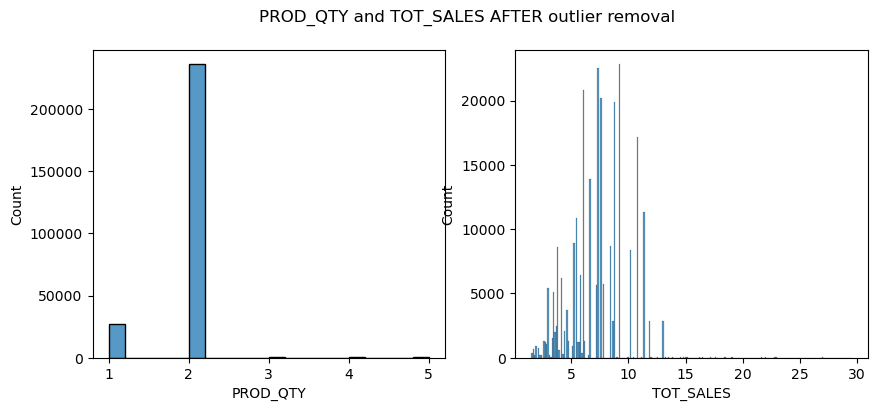

In [79]:
# visualise the data to view outliers (cont.)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(filtered_transactions["PROD_QTY"], ax=axes[0])
sns.histplot(filtered_transactions["TOT_SALES"], ax=axes[1])

plt.suptitle('PROD_QTY and TOT_SALES AFTER outlier removal')
plt.show()

In [80]:
# find outliers using the IQR method

# function to find records with outliers
def find_outliers_pandas(data, column):
	Q1 = data[column].quantile(0.25)
	Q3 = data[column].quantile(0.75)
	IQR = Q3 - Q1
	lower_bound = Q1 - 1.5 * IQR
	upper_bound = Q3 + 1.5 * IQR
	outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)] ## outliers are those that lie beyond the lowerbound and upperbound
	return outliers


# find records with outliers for each specified column
columns = ["PROD_QTY", "TOT_SALES"]
outliers_dict = {}
for col in columns:
	outliers_dict[col] = find_outliers_pandas(filtered_transactions, col)

outliers_dict#["PROD_QTY"]

{'PROD_QTY':              DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
 1      2019-05-14          1            1307     348        66   
 3      2018-08-17          2            2373     974        69   
 4      2018-08-18          2            2426    1038       108   
 5      2019-05-19          4            4074    2982        57   
 6      2019-05-16          4            4149    3333        16   
 ...           ...        ...             ...     ...       ...   
 264754 2018-10-07        268          268396  264841         8   
 264755 2018-10-22        268          268463  264916        87   
 264756 2019-04-28        268          268491  264947        56   
 264824 2019-03-13        272          272193  269906         9   
 264832 2018-08-13        272          272358  270154        74   
 
                                        PROD_NAME  PROD_QTY  TOT_SALES  
 1                       CCs Nacho Cheese    175g         3        6.3  
 3         Smiths Chip Thinly  S/Cre

##### Find incorrect labels

In [95]:
## get number of unique product names
unique_prodname = np.unique(filtered_transactions["PROD_NAME"])
num_unique_prodname = len(np.unique(filtered_transactions["PROD_NAME"]))
print(f"The number of unique product names is: {num_unique_prodname}")

The number of unique product names is: 114


In [82]:
for name in unique_prodname:
    print(name)

Burger Rings 220g
CCs Nacho Cheese    175g
CCs Original 175g
CCs Tasty Cheese    175g
Cheetos Chs & Bacon Balls 190g
Cheetos Puffs 165g
Cheezels Cheese 330g
Cheezels Cheese Box 125g
Cobs Popd Sea Salt  Chips 110g
Cobs Popd Sour Crm  &Chives Chips 110g
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g
Dorito Corn Chp     Supreme 380g
Doritos Cheese      Supreme 330g
Doritos Corn Chip Mexican Jalapeno 150g
Doritos Corn Chip Southern Chicken 150g
Doritos Corn Chips  Cheese Supreme 170g
Doritos Corn Chips  Nacho Cheese 170g
Doritos Corn Chips  Original 170g
Doritos Mexicana    170g
Doritos Salsa       Medium 300g
Doritos Salsa Mild  300g
French Fries Potato Chips 175g
Grain Waves         Sweet Chilli 210g
Grain Waves Sour    Cream&Chives 210G
GrnWves Plus Btroot & Chilli Jam 180g
Infuzions BBQ Rib   Prawn Crackers 110g
Infuzions Mango     Chutny Papadums 70g
Infuzions SourCream&Herbs Veg Strws 110g
Infuzions Thai SweetChili PotatoMix 110g
Infzns Crn Crnchers Tangy Gcamole 110g
Kettle 135g Swt Pot S

By reviewing 114 unique product names, no category item appears to be incorrectly labelled or identified. There are no two products with a similar names, meaning there are no two names for a product. To further verify this information, it is best to seek confirmation from relevant stakeholders of the project.

### Task 2: Examine and Clean Customer data
* Do all above tasks + identify nulls
* Merge the transaction and customer data together so it’s ready for the analysis.

##### View

In [86]:
# view purchases data
print(f"Shape of purchases data: {purchases.shape}")
purchases.head()

Shape of purchases data: (72637, 3)


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


##### Check data types

In [88]:
# check data types of each column
data_types = purchases.dtypes
print("Data Types:")
print(data_types)

Data Types:
LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object


##### Check missing values

In [90]:
# check for missing values
missing_values = purchases.isnull().sum()
print("Missing values:")
print(missing_values)

Missing values:
LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


##### Check duplicates

In [92]:
# check for duplicates
duplicates = purchases[purchases.duplicated()]
print(f"{len(duplicates)} duplicates found.")

0 duplicates found.


The data in this table is categorical; therefore, there are no outliers to process.

##### Find incorrect labels

In [97]:
## get number of unique customer life stages
unique_lifestages = np.unique(purchases["LIFESTAGE"])
num_unique_lifestages = len(unique_lifestages)
print(f"The number of unique customer lifestages is: {num_unique_lifestages}")

The number of unique customer lifestages is: 7


In [98]:
for label in unique_lifestages:
    print(label)

MIDAGE SINGLES/COUPLES
NEW FAMILIES
OLDER FAMILIES
OLDER SINGLES/COUPLES
RETIREES
YOUNG FAMILIES
YOUNG SINGLES/COUPLES


In [103]:
## get number of unique customer types
unique_prem_cust = np.unique(purchases["PREMIUM_CUSTOMER"])
num_unique_prem_cust = len(unique_prem_cust)
print(f"The number of unique customer types is: {num_unique_prem_cust}")

The number of unique customer types is: 3


In [102]:
for label in unique_prem_cust:
    print(label)

Budget
Mainstream
Premium


##### Merge Purchases & Transaction data

In [106]:
transaction_purchases = pd.merge(filtered_transactions, purchases, on=["LYLTY_CARD_NBR"])
transaction_purchases.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget


### Task 3: Data analysis and customer segments
* Define the metrics – look at total sales, drivers of sales, where the highest sales are coming from etc.
* Explore the data - create charts and graphs + note any interesting trends and/or insights you find.
* Deep dive into customer segments – define your recommendation from your insights, determine which segments we should be targeting, if packet sizes are relative, form overall conclusion based on your analysis. 

In [ ]:
## get number of unique customer life stages
unique_lifestages = np.unique(purchases["LIFESTAGE"])
num_unique_lifestages = len(unique_lifestages)
print(unique_lifestages)
print(f"The number of unique customer lifestages is: {num_unique_lifestages}")